In [1]:
import json
import pandas as pd

In [2]:
semantic_types = []

with open('label_list', 'r') as input_file:
	for line in input_file:
		semantic_types.append(line[:-1])

semantic_types

['person_name',
 'business_name',
 'phone_number',
 'address',
 'street_name',
 'city',
 'neighborhood',
 'lat_lon_cord',
 'zip_code',
 'borough',
 'school_name',
 'color',
 'car_make',
 'city_agency',
 'area_of_study',
 'subject_in_school',
 'school_level',
 'college_name',
 'website',
 'building_classification',
 'vehicle_type',
 'location_type',
 'park_playground',
 'other']

In [3]:
with open('task2wm1.json', 'r') as pred_file:
	pred = json.load(pred_file)

with open('task2-manual-2.json', 'r') as label_file:
	label = json.load(label_file)


In [4]:
pred_dict = {}  # {col_name:[pred_type1, pred_type2, ..]}

for col in pred['predicted_types']:
	col_name = col['column_name']
	for pred_label in col['semantic_types']:
		if pred_dict.get(col_name):
			pred_dict[col_name].append(pred_label['semantic_type'])
		else:
			pred_dict[col_name] = []
			pred_dict[col_name].append(pred_label['semantic_type'])

pred_dict

{'bdjm-n7q4.CrossStreet2': ['street_name'],
 '3btx-p4av.COMPARABLE_RENTAL___1__Neighborhood': ['neighborhood'],
 's3zn-tf7c.QUEENS_CONDOMINIUM_PROPERTY_Neighborhood': ['neighborhood'],
 '5mw2-hzqx.BROOKLYN_CONDOMINIUM_PROPERTY_Building_Classification': ['building_classification'],
 '7btz-mnc8.Provider_Last_Name': ['person_name'],
 'vrn4-2abs.SCHOOL_LEVEL_': ['school_level'],
 'q5za-zqz7.Agency': ['city_agency'],
 'niy5-4j7q.MANHATTAN___COOPERATIVES_COMPARABLE_PROPERTIES___Building_Classification': ['building_classification'],
 'ci93-uc8s.telephone': ['phone_number'],
 'mq9d-au8i.School_Name': ['school_name'],
 'dm9a-ab7w.AUTH_REP_FIRST_NAME': ['person_name'],
 'uzcy-9puk.Incident_Zip': ['zip_code'],
 'ccgt-mp8e.Borough': ['borough'],
 'm59i-mqex.QUEENS_CONDOMINIUM_PROPERTY_Building_Classification': ['building_classification'],
 '6je4-4x7e.SCHOOL_LEVEL_': ['school_level'],
 'qgea-i56i.PREM_TYP_DESC': ['location_type'],
 'h9gi-nx95.VEHICLE_TYPE_CODE_5': ['vehicle_type'],
 '8u86-bviy.Addr

In [5]:
label_dict = {}  # {col_name:[label_type1, label_type2, ..]}

for col in label['actual_types']:
	col_name = col['column_name']
	for manual_label in col['manual_labels']:
		if label_dict.get(col_name):
			label_dict[col_name].append(manual_label['semantic_type'])
		else:
			label_dict[col_name] = []
			label_dict[col_name].append(manual_label['semantic_type'])

label_dict

{'2bmr-jdsv.DBA': ['business_name'],
 '2bnn-yakx.Vehicle_Body_Type': ['vehicle_type'],
 '2bnn-yakx.Vehicle_Color': ['color'],
 '2bnn-yakx.Vehicle_Make': ['car_make'],
 '2sps-j9st.PERSON_FIRST_NAME': ['person_name'],
 '2sps-j9st.PERSON_LAST_NAME': ['person_name'],
 '2v9c-2k7f.DBA': ['business_name'],
 '3aka-ggej.CORE_SUBJECT___MS_CORE_and__09_12_ONLY_': ['subject_in_school'],
 '3btx-p4av.COMPARABLE_RENTAL___1__Building_Classification': ['building_classification'],
 '3btx-p4av.COMPARABLE_RENTAL___1__Neighborhood': ['neighborhood'],
 '3btx-p4av.MANHATTAN___COOPERATIVES_COMPARABLE_PROPERTIES___Building_Classification': ['building_classification'],
 '3miu-myq2.COMPARABLE_RENTAL___2__Neighborhood': ['neighborhood'],
 '3rfa-3xsf.Cross_Street_2': ['street_name'],
 '3rfa-3xsf.Incident_Zip': ['zip_code'],
 '3rfa-3xsf.Park_Facility_Name': ['park_playground', 'school_name'],
 '3rfa-3xsf.Street_Name': ['street_name'],
 '43nn-pn8j.DBA': ['business_name'],
 '446w-773i.Address_1': ['address'],
 '4d7f-

In [6]:
columns = ['Semantic Type', 'Precision', 'Recall', 'F1']
result = pd.DataFrame(columns=columns)

for type in semantic_types:
	correct_pred = 0
	tol_col_type = 0
	tol_col_pred_type = 0

	for col in pred_dict:
		for pred_type in pred_dict[col]:
			if pred_type == type:
				tol_col_pred_type += 1
				for label_type in label_dict[col]:
					if label_type == type:
						correct_pred += 1

	for col in label_dict:
		for label_type in label_dict[col]:
			if label_type == type:
				tol_col_type += 1

	if tol_col_type and tol_col_pred_type:
		precision = float(correct_pred)/tol_col_pred_type
		recall = float(correct_pred)/tol_col_type
		f1 = 2 * (precision * recall) / (precision + recall)

		result.loc[len(result)] = [type, precision, recall, f1]

In [113]:
result

,Semantic Type,Precision,Recall,F1
0,person_name,1.000000,0.741935,0.851852
1,business_name,1.000000,0.888889,0.941176
2,phone_number,1.000000,1.000000,1.000000
3,address,0.928571,0.928571,0.928571
4,street_name,0.909091,0.800000,0.851064
5,city,1.000000,0.692308,0.818182
6,neighborhood,0.531250,1.000000,0.693878
7,lat_lon_cord,1.000000,1.000000,1.000000
8,zip_code,1.000000,1.000000,1.000000
9,borough,0.862069,1.000000,0.925926


In [12]:
# xs = semantic_types
xs = []
ys1 = []
ys2 = []
for index, row in result.iterrows():
    xs.append(row[0])
    ys1.append(row[1])
    ys2.append(row[2])
print(xs)
print(ys1)
print(ys2)

['person_name', 'business_name', 'phone_number', 'address', 'street_name', 'city', 'neighborhood', 'lat_lon_cord', 'zip_code', 'borough', 'school_name', 'color', 'car_make', 'city_agency', 'area_of_study', 'subject_in_school', 'school_level', 'website', 'building_classification', 'vehicle_type', 'location_type', 'park_playground']
[1.0, 1.0, 1.0, 0.9285714285714286, 0.9090909090909091, 1.0, 0.53125, 1.0, 1.0, 0.8620689655172413, 1.0, 1.0, 0.5789473684210527, 0.8571428571428571, 1.0, 0.8823529411764706, 1.0, 0.6923076923076923, 1.0, 0.6, 1.0, 0.8571428571428571]
[0.7419354838709677, 0.8888888888888888, 1.0, 0.9285714285714286, 0.8, 0.6923076923076923, 1.0, 1.0, 1.0, 1.0, 0.7777777777777778, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8181818181818182, 1.0, 0.75]


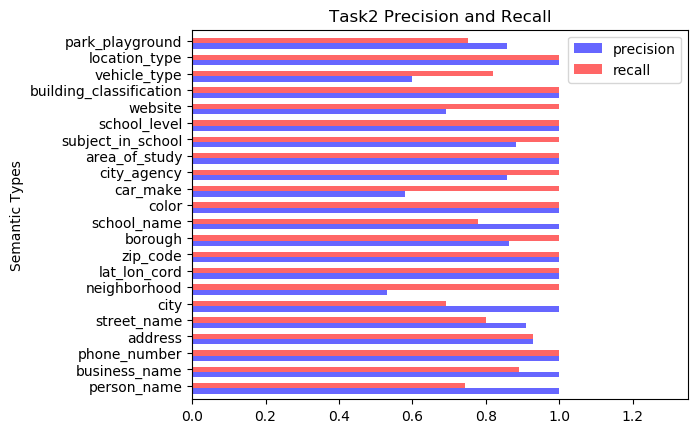

In [70]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

n = len(xs)
width = 0.65
fig, ax = plt.subplots()
xs1 = np.arange(0, 2*n, step=2)

ax.barh(xs1, ys1, width, align='center', label='precision', tick_label=xs, alpha=0.6, color='b')
ax.barh(xs1+width, ys2, width, align='center', label='recall', tick_label=xs, alpha=0.6, color='r')
ax.set(yticks=(xs1 + width), xlim=[0, 1.35], ylim=[-1, 2*n])
ax.legend()
plt.yticks()
plt.ylabel('Semantic Types')
plt.title('Task2 Precision and Recall')
plt.show()